In [1]:
import numpy as np
import scipy.linalg as spla
import scipy.fftpack as fp
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif')

In [2]:
## Parameters

dt = 0.01 # time step (sample spacing)
n_agents = 2 # number of agents
k = 10 # K 
w_mul = 10 # w multiplier
sim_time = 30. # sumulation time (in seconds)
n_it = int(sim_time / dt)
print(n_it)

3000


In [3]:
## Init vals
#ang_speed = w_mul * np.random.rand(n_agents)    # w
ang_speed = np.power(w_mul * np.arange(1, n_agents+1), 1) 
#ang_speed = w_mul 
#theta_0 = 2 * np.pi * np.random.rand(n_agents)    # theta
theta_0 = np.array([0, np.pi])
print(ang_speed)
print(theta_0)

[10 20]
[0.         3.14159265]


In [4]:
## Progress recording
thetas = np.zeros((n_agents, n_it))
thetas_dot = np.zeros_like(thetas)
time_vals = np.linspace(0., sim_time, n_it)

In [5]:
## Start loop
theta = theta_0
for i in range(n_it):
    thetas[:, i] = theta 
    
    # sum of sins
    theta_mat = np.repeat(theta.reshape(n_agents, 1), n_agents, axis=1)
    diffs = theta_mat.T - theta_mat
    sins = np.sin(diffs)
    sums_sins = np.sum(sins, axis=1)
    
    theta_new = theta + dt * (ang_speed + (k / n_agents) * sums_sins)
    thetas_dot[:, i] = np.divide(theta_new - theta, dt)
    theta = theta_new 

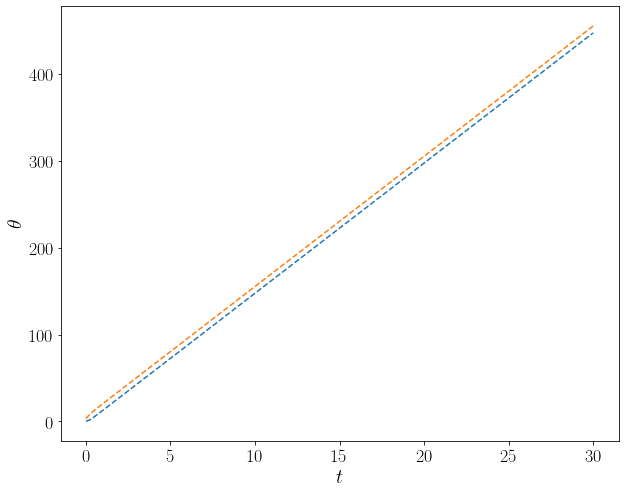

In [6]:
## Plot theta 
plt.figure(figsize=(10, 8))
for i in range(n_agents):
    plt.plot(time_vals, thetas[i], '--')
plt.xlabel(r'$t$', fontsize=20)
plt.ylabel(r'$\theta$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show() 

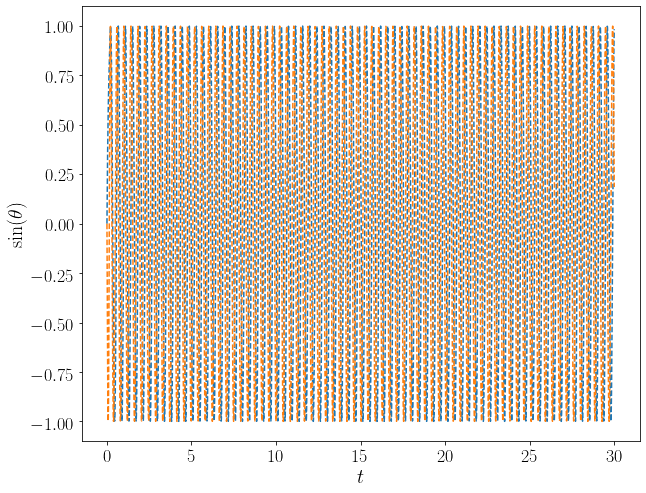

In [7]:
## Plot sin theta 
thetas_sin = np.sin(thetas)
plt.figure(figsize=(10, 8))
for i in range(n_agents):
    plt.plot(time_vals, thetas_sin[i], '--')
plt.xlabel(r'$t$', fontsize=20)
plt.ylabel(r'$\sin(\theta)$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show() 

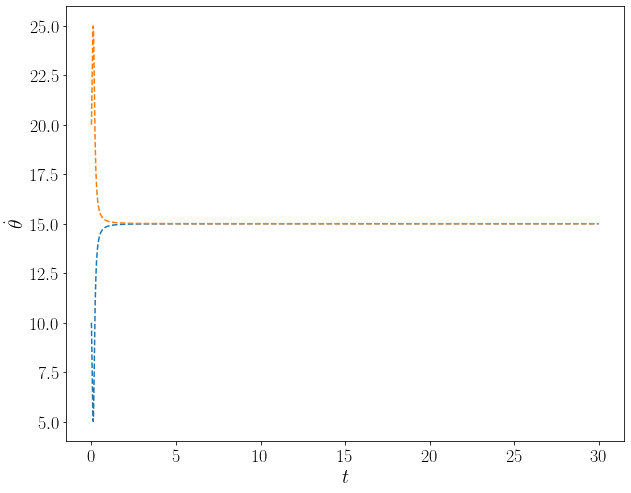

In [8]:
## Plot theta dot
plt.figure(figsize=(10, 8))
for i in range(n_agents):
    plt.plot(time_vals, thetas_dot[i], '--')
plt.xlabel(r'$t$', fontsize=20)
plt.ylabel(r'$\dot{\theta}$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [9]:
## Check convergence const
true_mean = np.mean(thetas_dot[:, 0])
conver_mean = thetas_dot[0, -1]
print(true_mean)
print(conver_mean)

15.000000000000009
14.99988847257896


(256,)


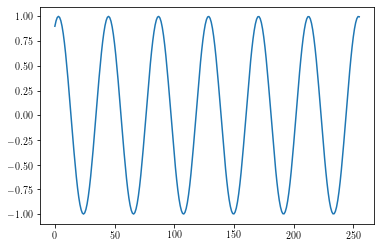

In [10]:
## FFT
start_it = 400
end_it = 656
y = thetas_sin[0][start_it:end_it]
print(y.shape)
plt.plot(y)
plt.show()

In [11]:
yf = np.abs(fp.fft(y))
freq_vals = np.linspace(0, 2 * np.pi * 1./(2.*dt), (end_it - start_it) / 2)
plt.plot(freq_vals, yf[:(end_it - start_it)//2])
plt.xlim((0, 15))
plt.show()

TypeError: object of type <class 'float'> cannot be safely interpreted as an integer.